#### Hand Written Digits Image Noise Reduction Using Hopfield Network

In [38]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def sign_func(x):
    """ Sign Function"""
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return x


def flipping_noise(image, flip_fraction):
    """
    This function takes an image and a fraction representing the amount of noise
    to add and returns a noisy image. The noise is simply flipping of pixels.
    """
    # Flatten the image if it is not
    if len(image.shape) > 1:
        image = image.flatten()

    # Generate a mask for flipping pixels
    noise_mask = np.random.choice([False, True], len(image), p=[1-flip_fraction, flip_fraction])
    
    # Return a copy of the image with the pixels at the mask indices flipped
    return np.where(noise_mask, -image, image)

In [40]:
# Load training data sets
try:
    train_set = idx2numpy.convert_from_file('./dataset/train-images.idx3-ubyte')
    label_set = idx2numpy.convert_from_file('./dataset/train-labels.idx1-ubyte')
except FileNotFoundError as e:
    print("One or more data files not found.")
    print(e)
    exit()

In [41]:
# Parameters
threshold = 128
pattern_size = 2
pattern_index = 0
is_equal = False
iteration = 0
train_index = []
image_memo = []

In [42]:
# Pick training images
for digit in range(pattern_size):
    digit_indices = np.where(label_set == digit)[0]
    train_index.append(digit_indices[0])

train_images = train_set[train_index]

# Transpose the matrix so that the image indices are the third dimension
X_train = np.transpose(train_images, (1, 2, 0))

# Reshape the images (28*28) to intput data (784*1)
X_train = np.reshape(X_train, (784, pattern_size))

# Transfer greyscale images to bipolar images
X_train = np.where(X_train > threshold, 1, -1)

In [43]:
# Hopfield neural network training
weights = X_train @ X_train.T

# Keep the diagonal elements to be zero
np.fill_diagonal(weights, 0)

In [44]:
# Hopfield neural network noise reduction
Y_test_prev = flipping_noise(X_train[:, pattern_index], 0.1)

# Vectorize the sign function and apply it to network
sign_func_vec = np.vectorize(sign_func)

while not is_equal:
    Y_test_curr = sign_func_vec(weights @ Y_test_prev)

    # Check if the output is at its stable state
    is_equal = np.array_equal(Y_test_prev, Y_test_curr)
    image_memo.append(Y_test_prev)
    Y_test_prev = Y_test_curr
    iteration += 1

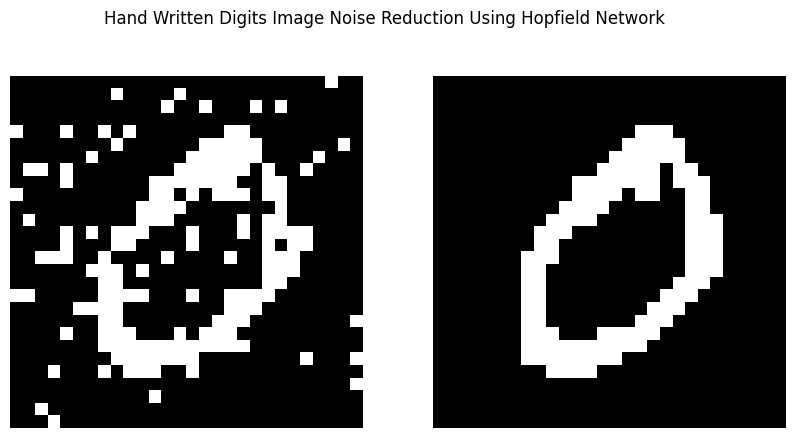

In [45]:
# Plot test image and output image
fig = plt.figure(figsize=(10, 5))

for i in range(iteration):
    plt.subplot(1, iteration, i+1)
    output_image = image_memo[i].reshape(28, 28)
    plt.imshow(output_image, cmap='gray')
    plt.suptitle('Hand Written Digits Image Noise Reduction Using Hopfield Network')
    plt.axis('off') 

plt.show()